# Calculate lag correlations between time series

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [11]:
t = np.linspace(-50,50,500)
y1 = np.exp(-t**2)
y2 = np.exp(-(t-20)**2)

In [12]:
corr = signal.correlate(y1,y2,method='fft')

In [13]:
lags = signal.correlation_lags(len(y1),len(y2))

In [15]:
gs_index = np.load('/Users/noahrosenberg/Downloads/gulfstream_gradient_variables_nroll1.npz')

In [24]:
gsi = np.mean(gs_index['max_gradient'],axis=1)

In [29]:
AMV = xr.load_dataarray('/Users/noahrosenberg/Downloads/AMVindex_ERA5_1x1.nc')

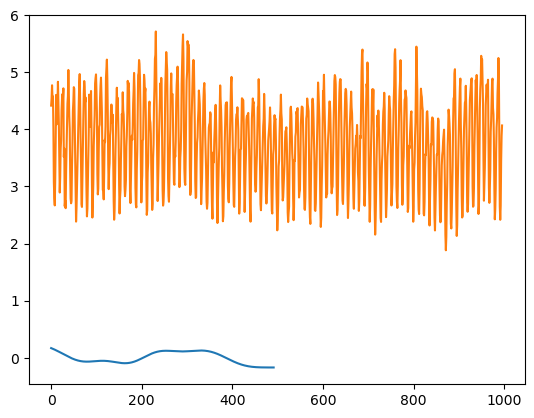

In [36]:
plt.plot(AMV)
plt.plot(gsi)

In [42]:
gsi = gsi[39*12:]

In [47]:
b,a = signal.butter(6,1/120,'lp')
gsi_filt = signal.filtfilt(b,a,gsi)

In [60]:
corr = signal.correlate(AMV,gsi_filt,mode='same')

In [61]:
lags = signal.correlation_lags(len(AMV),len(gsi_filt),mode='same')

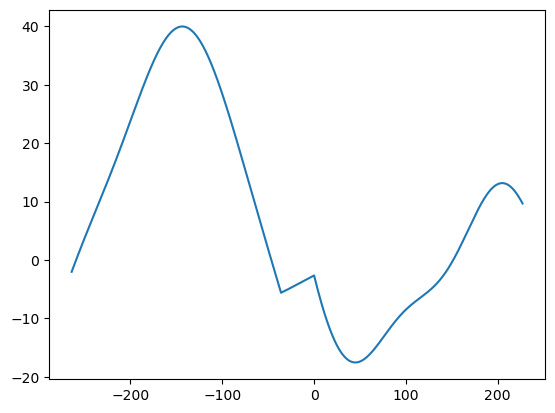

In [69]:
plt.plot(lags,corr)